In [1]:
import pandas as pd
import numpy as np
import plotly.express as plt
from math import log, exp

df = pd.read_csv('./prices250.txt', sep='\s+', header=None, index_col=None)
sign = lambda x : 1 if x >= 0 else -1
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.80,4.13,28.54,17.95,47.41,56.23,52.21,13.96,41.87,49.42,...,48.26,37.11,53.10,26.29,26.27,61.66,50.22,9.81,33.94,38.33
246,43.87,4.13,28.56,17.96,47.11,56.81,52.22,13.81,41.94,49.35,...,48.21,37.14,53.08,26.24,25.97,61.67,50.26,9.81,34.06,38.35
247,43.66,4.14,28.59,18.05,47.13,57.05,52.28,13.84,41.73,49.24,...,48.62,37.14,53.11,26.07,25.74,61.67,50.29,9.82,33.86,38.07
248,43.61,4.14,28.64,18.06,46.72,56.97,52.39,13.86,41.70,49.28,...,48.32,37.17,53.16,26.00,25.96,61.69,50.32,9.81,34.06,39.07


In [2]:

nInst = 100
start = 0
thres = 0.7

corr = np.matrix([[0.0 for _ in range(100)] for _ in range(100)])

checked = set()
for i in range(start, nInst):
    stockA = df.iloc[:,i]
    for j in range(start, nInst):
        stockB = df.iloc[:,j]
        if str((i, j)) in checked:
            continue
            
        c = np.corrcoef(stockA, stockB)[0][1]
        if abs(c) >= thres:
            corr[i, j] = c
            corr[j, i] = c

corr
plt.imshow(corr, title = 'Algothon Stock Correlation')

In [3]:
max_corr = {}

for c in range(nInst):
    c_corr = {k: abs(corr[c, v]) for k, v in enumerate(range(100)) if corr[c, v] != 1}
    max_corr[c] = max(c_corr, key=c_corr.get)
    if max(c_corr.values()) < thres:
        max_corr[c] = c
        


In [4]:
max_corr

{0: 47,
 1: 2,
 2: 95,
 3: 46,
 4: 4,
 5: 62,
 6: 92,
 7: 7,
 8: 95,
 9: 9,
 10: 2,
 11: 11,
 12: 91,
 13: 42,
 14: 2,
 15: 78,
 16: 16,
 17: 86,
 18: 52,
 19: 19,
 20: 20,
 21: 21,
 22: 51,
 23: 76,
 24: 24,
 25: 69,
 26: 2,
 27: 81,
 28: 52,
 29: 29,
 30: 30,
 31: 89,
 32: 49,
 33: 42,
 34: 87,
 35: 35,
 36: 57,
 37: 37,
 38: 38,
 39: 39,
 40: 80,
 41: 55,
 42: 33,
 43: 43,
 44: 74,
 45: 45,
 46: 15,
 47: 78,
 48: 48,
 49: 60,
 50: 50,
 51: 89,
 52: 74,
 53: 53,
 54: 32,
 55: 50,
 56: 70,
 57: 36,
 58: 58,
 59: 39,
 60: 49,
 61: 61,
 62: 65,
 63: 21,
 64: 64,
 65: 65,
 66: 71,
 67: 52,
 68: 68,
 69: 62,
 70: 70,
 71: 60,
 72: 72,
 73: 14,
 74: 74,
 75: 75,
 76: 60,
 77: 77,
 78: 78,
 79: 65,
 80: 80,
 81: 62,
 82: 82,
 83: 83,
 84: 51,
 85: 85,
 86: 21,
 87: 34,
 88: 88,
 89: 89,
 90: 96,
 91: 76,
 92: 6,
 93: 15,
 94: 0,
 95: 32,
 96: 96,
 97: 6,
 98: 98,
 99: 99}

In [5]:
def diff(stock):
    return stock.map(log).diff().dropna().reset_index(drop=True)

D = pd.DataFrame()
for stock in df:
    D[stock] = diff(df[stock])


D.head(10)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.003456,-0.004090,0.000970,-0.005417,-0.002940,-0.005200,0.000555,0.003212,-0.003632,-0.002027,...,0.003436,-0.000261,-0.000365,-0.003164,0.006234,0.000000,0.001355,0.002694,0.000900,0.006064
1,-0.001480,0.004090,0.002259,-0.002175,0.003150,0.011662,0.000924,-0.004285,0.003632,0.006471,...,-0.007651,0.000782,0.000730,-0.002468,-0.004360,0.000158,-0.000193,0.000896,-0.001200,0.011302
2,-0.001235,0.004073,-0.001290,0.002718,-0.000839,0.009615,0.000185,-0.006462,0.002037,-0.001614,...,0.000960,0.000260,0.000182,-0.001766,-0.010668,0.000475,0.001160,-0.001794,0.011640,0.000956
3,-0.005948,-0.002035,-0.001615,-0.001630,0.008982,0.005725,0.000738,0.005925,0.007435,0.000807,...,0.012013,-0.000521,-0.000547,0.007047,-0.003476,0.000000,0.001352,0.000000,0.001779,-0.014195
4,-0.000249,0.008114,-0.001294,0.001630,-0.002498,-0.000476,-0.000185,-0.003766,-0.002022,0.004428,...,-0.012588,-0.000521,-0.000182,-0.009171,-0.014347,-0.000475,0.000579,-0.002697,-0.000593,-0.006564
5,0.001491,0.000000,-0.000972,-0.005990,0.002082,-0.001906,-0.000185,-0.014115,-0.002477,0.000402,...,0.005551,-0.000261,-0.000548,0.001416,-0.005151,0.000000,0.001349,-0.004511,0.002073,-0.005871
6,-0.002486,-0.006079,-0.002596,0.003272,-0.002499,-0.008300,-0.001663,-0.005482,-0.004973,0.000602,...,-0.000955,-0.000782,-0.001096,-0.004255,0.014739,-0.000475,-0.001735,0.000000,-0.003556,0.002450
7,0.002982,0.000000,-0.002277,0.002175,0.002083,0.001762,-0.000555,-0.013282,0.001811,0.001404,...,0.008750,-0.000783,-0.000914,-0.008924,0.009812,-0.000475,0.000193,-0.003623,-0.006850,0.015301
8,-0.000496,-0.002035,-0.000977,-0.002720,0.002287,-0.000640,-0.001110,-0.009516,0.002936,-0.004015,...,0.017274,-0.000784,-0.000549,0.005007,-0.011403,-0.000476,-0.002125,-0.000908,0.006257,0.001926
9,0.004706,0.000000,-0.000978,-0.002181,-0.001247,0.005906,-0.000185,-0.010175,-0.001354,-0.003224,...,0.000186,-0.000261,-0.000549,0.000713,-0.013470,-0.000159,0.000000,0.000908,0.001780,0.006952


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

models = np.array([GradientBoostingRegressor() for _ in range(nInst)])


preds = pd.DataFrame()
for s, m in enumerate(models):
    y = D[s]
    X = D[[max_corr[s]]]

    pred = []
    for i in range(1, 248):

        X_train, y_train = X.iloc[:i], y.iloc[1:i+1]
        X_test = [X.iloc[i+1]]

        m.fit(X_train, y_train)

        pred.append(m.predict(X_test))
    pred = pd.Series([p[0] for p in pred])
    preds[s] = pred

preds

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.001480,0.004090,0.002259,-0.002175,0.003150,0.011662,0.000924,-0.004285,0.003632,0.006471,...,-0.007651,0.000782,0.000730,-0.002468,-0.004360,0.000158,-0.000193,8.964590e-04,-0.001200,0.011302
1,-0.001480,0.004090,0.002259,0.002718,-0.000839,0.009615,0.000924,-0.004285,0.003632,0.006471,...,-0.007651,0.000782,0.000730,-0.002468,-0.010668,0.000475,-0.000193,8.964233e-04,-0.001200,0.011302
2,-0.001480,-0.002034,0.002259,-0.001630,0.003150,0.009615,0.000924,-0.006462,0.003632,-0.001614,...,0.012012,0.000782,-0.000547,-0.002468,-0.003476,0.000475,0.001352,-5.151518e-09,0.011640,-0.014195
3,-0.001480,-0.002034,0.000483,0.001630,-0.000839,0.011662,-0.000185,0.005925,0.000805,0.004428,...,-0.012588,-0.000521,-0.000547,0.007047,-0.004360,0.000475,0.000579,-2.107204e-08,-0.000593,-0.014195
4,-0.005946,0.008113,-0.000972,-0.001630,0.002082,0.005725,-0.000184,0.005925,-0.002477,0.004428,...,0.000960,-0.000261,-0.000548,0.001416,-0.010668,0.000158,0.001160,-4.510531e-03,0.011640,-0.014195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.000314,0.000235,0.000100,0.000026,0.000223,0.001283,-0.000087,-0.004135,-0.001367,0.000141,...,0.002010,-0.000024,-0.000510,-0.002010,0.000124,0.000113,-0.000007,5.000436e-04,0.001090,0.002397
243,-0.001530,0.001177,-0.000330,0.003552,0.001750,0.000470,-0.000246,-0.001146,0.002190,-0.001148,...,-0.003273,0.000690,0.000121,-0.001842,0.001383,-0.000083,-0.000173,-6.133797e-04,0.002120,-0.004201
244,-0.000109,-0.001731,-0.000079,0.000642,-0.000726,-0.005909,0.000387,0.000966,0.000353,0.000451,...,0.004064,-0.000093,-0.000066,0.002782,0.004860,0.000080,-0.000739,-3.717017e-03,0.001089,-0.007395
245,-0.000883,-0.004501,-0.000630,-0.001545,-0.002512,-0.005488,-0.000079,-0.002250,0.000933,0.001449,...,0.004582,0.000009,0.000756,0.000323,-0.003023,-0.000083,-0.000736,1.492632e-03,0.001465,-0.005918


In [22]:
preds.to_csv('preds.csv', index=False)
preds = pd.read_csv('preds.csv')
preds.columns = range(100)
preds

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.001480,0.004090,0.002259,-0.002175,0.003150,0.011662,0.000924,-0.004285,0.003632,0.006471,...,-0.007651,0.000782,0.000730,-0.002468,-0.004360,0.000158,-0.000193,8.964590e-04,-0.001200,0.011302
1,-0.001480,0.004090,0.002259,0.002718,-0.000839,0.009615,0.000924,-0.004285,0.003632,0.006471,...,-0.007651,0.000782,0.000730,-0.002468,-0.010668,0.000475,-0.000193,8.964233e-04,-0.001200,0.011302
2,-0.001480,-0.002034,0.002259,-0.001630,0.003150,0.009615,0.000924,-0.006462,0.003632,-0.001614,...,0.012012,0.000782,-0.000547,-0.002468,-0.003476,0.000475,0.001352,-5.151518e-09,0.011640,-0.014195
3,-0.001480,-0.002034,0.000483,0.001630,-0.000839,0.011662,-0.000185,0.005925,0.000805,0.004428,...,-0.012588,-0.000521,-0.000547,0.007047,-0.004360,0.000475,0.000579,-2.107204e-08,-0.000593,-0.014195
4,-0.005946,0.008113,-0.000972,-0.001630,0.002082,0.005725,-0.000184,0.005925,-0.002477,0.004428,...,0.000960,-0.000261,-0.000548,0.001416,-0.010668,0.000158,0.001160,-4.510531e-03,0.011640,-0.014195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.000314,0.000235,0.000100,0.000026,0.000223,0.001283,-0.000087,-0.004135,-0.001367,0.000141,...,0.002010,-0.000024,-0.000510,-0.002010,0.000124,0.000113,-0.000007,5.000436e-04,0.001090,0.002397
243,-0.001530,0.001177,-0.000330,0.003552,0.001750,0.000470,-0.000246,-0.001146,0.002190,-0.001148,...,-0.003273,0.000690,0.000121,-0.001842,0.001383,-0.000083,-0.000173,-6.133797e-04,0.002120,-0.004201
244,-0.000109,-0.001731,-0.000079,0.000642,-0.000726,-0.005909,0.000387,0.000966,0.000353,0.000451,...,0.004064,-0.000093,-0.000066,0.002782,0.004860,0.000080,-0.000739,-3.717017e-03,0.001089,-0.007395
245,-0.000883,-0.004501,-0.000630,-0.001545,-0.002512,-0.005488,-0.000079,-0.002250,0.000933,0.001449,...,0.004582,0.000009,0.000756,0.000323,-0.003023,-0.000083,-0.000736,1.492632e-03,0.001465,-0.005918


<AxesSubplot:>

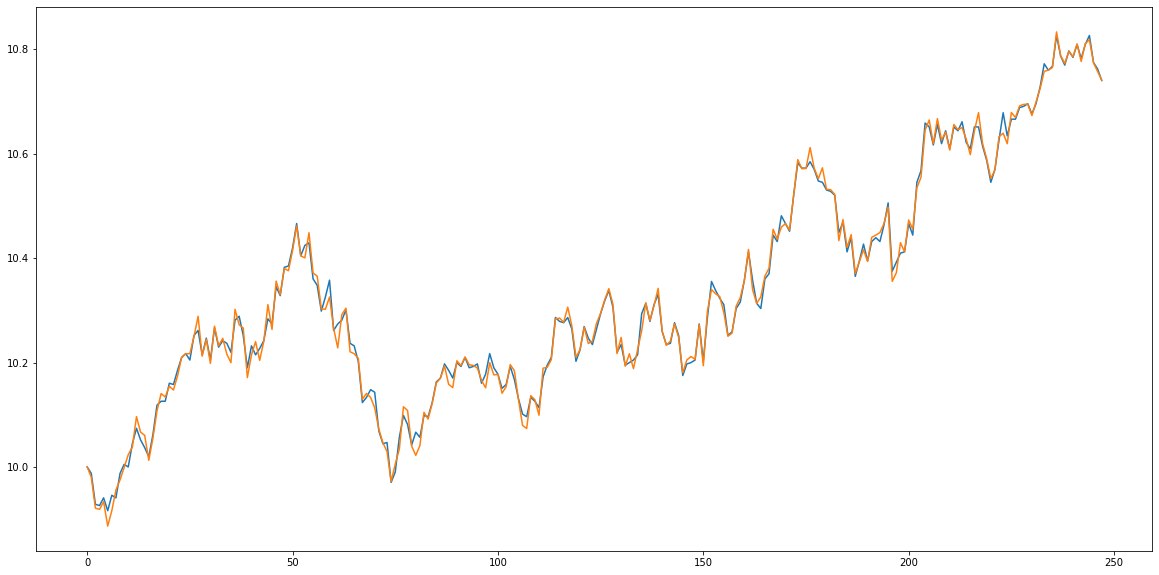

In [92]:
true = D.iloc[2:].reset_index(drop=True)

probs = 0.5

p = (preds[0] * probs).map(exp).to_numpy()
t = true[0].map(exp).to_numpy()

true_price = [10]
pred_price = [10]

for i in range(247):
    true_price.append(true_price[-1] * t[i])
    pred_price.append(true_price[-1] * p[i])


true_price = pd.Series(true_price)
pred_price = pd.Series(pred_price)

true_price.plot(figsize=(20,10))
pred_price.plot()


In [42]:
l = []
for i in range(100):
    t = true[i].map(sign)
    p = preds[i].map(sign)

    probs = (sum(t == p) / t.__len__())
    if probs < 0.5:
        l.append(1-1*probs)
    else:
        l.append(probs)

In [91]:
mr

3    -0.001302
4    -0.002228
5    -0.001485
6    -0.001798
7     0.000435
8     0.000373
9     0.001176
10    0.002230
11    0.001361
12    0.002593
13    0.002153
14    0.001169
15    0.000924
16   -0.000615
17   -0.000306
18    0.001652
19    0.002203
20    0.002634
21    0.002441
22    0.000974
23    0.001458
24    0.002063
25    0.001393
26    0.001151
27    0.001630
28    0.001266
29   -0.000060
30    0.001026
31   -0.001146
32    0.000120
33    0.000362
34   -0.000120
35    0.000785
36   -0.001144
37    0.001263
38    0.001142
39    0.000361
40   -0.000726
41   -0.001203
42   -0.001805
43   -0.000603
44    0.001268
45    0.001263
46    0.001445
Name: 0, dtype: float64

<AxesSubplot:>

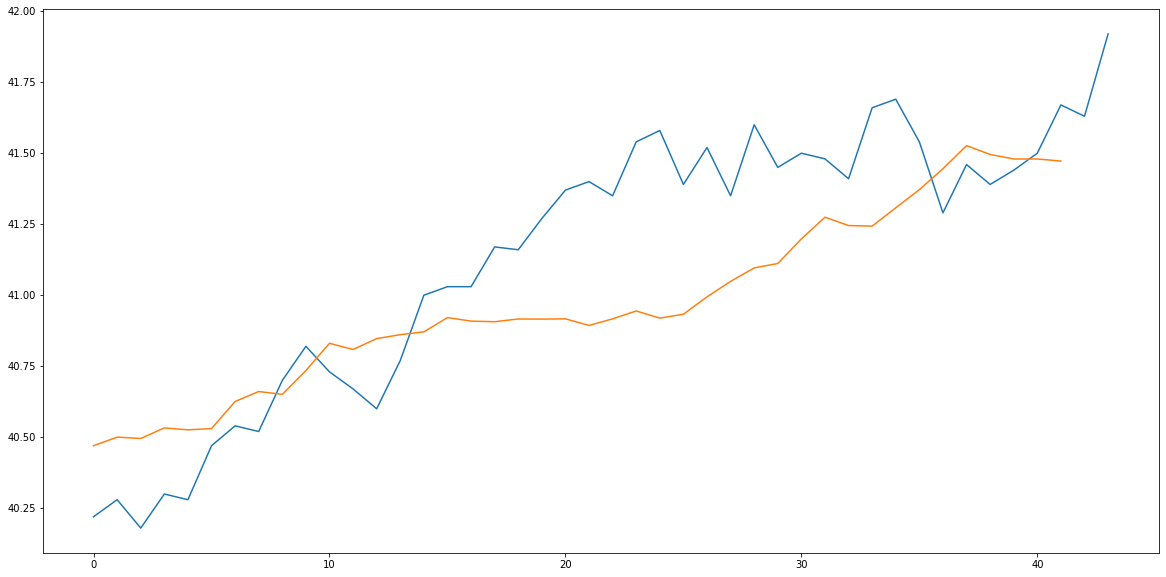

In [223]:
i = 0
bt = pd.read_csv('backtest.csv').iloc[:, i]
mr = D.iloc[:bt.__len__(), 0]
mr = mr.rolling(4).mean().dropna().reset_index(drop=True)

val = [40.47]
for m in mr:
    val.append(val[-1] * exp(m))


val = pd.Series(val)

tr = df[i].iloc[5:].reset_index(drop=True)[:mr.__len__()]

tr.plot(figsize=(20,10))
# bt.plot()
# val.plot()
preds.plot()

# GBR on Mean Reversion

In [221]:
model = GradientBoostingRegressor()

tr = D[0].iloc[4:48].reset_index(drop=True)
corr_s = D[47].iloc[4:48].reset_index(drop=True)
s = D[0].iloc[4:48].reset_index(drop=True)

X = pd.DataFrame([tr, corr_s, mr]).T
y = s

preds = []
for i in range(1, 42):
    X_train, y_train = X.iloc[:i], y.iloc[1:i+1]
    model.fit(X_train, y_train)
    preds.append(model.predict([X.iloc[i+1]])[0])

val = [40.47]
for m in preds:
    val.append(val[-1] * exp(m * 0.5))

preds = pd.Series(val) 

<AxesSubplot:>

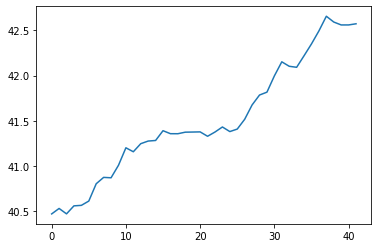

# Found Correlation in the Log Diff!! 

In [554]:
D

nInst = 100
start = 0
thres = 0.8

corr = np.matrix([[0.0 for _ in range(100)] for _ in range(100)])
zorrs = {}

checked = set()

for i in range(start, nInst):
    stockA = D.iloc[:,i]
    for j in range(start, nInst):
        stockB = D.iloc[:,j]
            
        c = np.corrcoef(stockA, stockB)[0][1]
        if abs(c) >= thres:
            corr[i, j] = c


plt.imshow(corr)


In [61]:

nInst = 100
start = 0
thres = 0.9

corr = np.matrix([[0.0 for _ in range(100)] for _ in range(100)])
corrs = {}

checked = set()

for d in range(1,20):
    for i in range(start, nInst):
        stockA = df.iloc[:-d,i]
        for j in range(start, nInst):
            stockB = df.iloc[d:,j]
                
            c = np.corrcoef(stockA, stockB)[0][1]
            if abs(c) >= thres:
                corr[i, j] = c


    max_corr = {}

    for c in range(nInst):
        c_corr = {k: abs(corr[c, v]) for k, v in enumerate(range(100)) if corr[c, v] != 1}
        max_corr[c] = max(c_corr, key=c_corr.get)
        if max(c_corr.values()) < thres:
            max_corr[c] = c
            
    for k, v in max_corr.items():
        if k != v and k not in corrs.keys() and v != 0:
            corrs[k] = (d, v)            


corrs

{80: (4, 68),
 12: (5, 49),
 8: (6, 95),
 11: (6, 76),
 68: (6, 52),
 71: (6, 44),
 67: (7, 44),
 91: (7, 49),
 2: (8, 95),
 6: (8, 92),
 17: (8, 86),
 22: (8, 29),
 60: (8, 49),
 70: (8, 31),
 92: (8, 31),
 1: (9, 95),
 14: (9, 2),
 15: (9, 78),
 18: (9, 52),
 28: (9, 52),
 57: (9, 36),
 87: (9, 34),
 95: (9, 32),
 96: (9, 39),
 42: (10, 33),
 54: (10, 32),
 62: (10, 65),
 72: (10, 5),
 46: (11, 15),
 49: (11, 60),
 51: (11, 89),
 5: (12, 65),
 34: (12, 76),
 39: (12, 21),
 76: (12, 49),
 86: (12, 97),
 89: (12, 54),
 31: (13, 89),
 40: (14, 57),
 29: (15, 52),
 52: (15, 57),
 97: (15, 76),
 65: (16, 28),
 78: (16, 21),
 32: (17, 36),
 47: (18, 78),
 41: (19, 5)}

<AxesSubplot:>

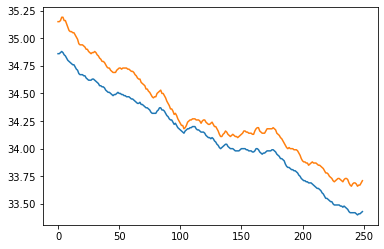

In [547]:
df[76].plot()
(df[95]-28).plot()

In [59]:
d = 4

p = df[68].iloc[:-d].diff().dropna().map(sign).reset_index(drop=True)
r = df[80].iloc[d:].diff().dropna().map(sign).reset_index(drop=True)

sum(p == r) / 245


0.46530612244897956

# Lag to predict Direction

<AxesSubplot:ylabel='Density'>

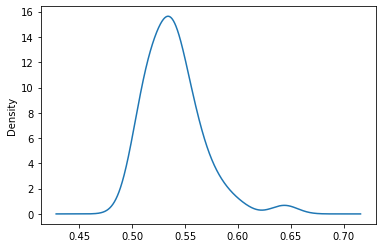

In [186]:

from sklearn.linear_model import LogisticRegression


scores = []
for r, v in corrs.items():
    model = LogisticRegression()
    d, p = v

    P = df[p].iloc[:-d].map(log).diff().dropna().reset_index(drop=True)
    P = pd.DataFrame([P]).T
    R = df[r].iloc[d:].diff().dropna().map(sign).reset_index(drop=True)

    X_train, y_train = P.iloc[:115], R.iloc[:115]
    X_test, y_test = P.iloc[115:], R.iloc[115:]

    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))


scores = pd.Series(scores)

scores = scores.map(lambda x : 1-x if x < 0.5 else x)

scores.plot(kind='kde')





# Mean Reversion

do this to avoid overfitting and dierection correction with LAG above!!!

GOT IT!!! We can use mean reverting to avoid going up into those tiny bumps

<AxesSubplot:ylabel='Density'>

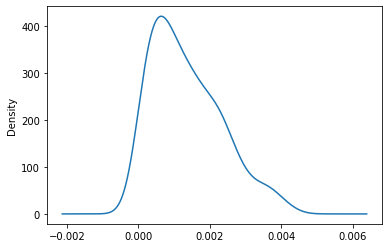

In [199]:

D.rolling(3).mean().dropna()[0].diff().map(abs).dropna().plot(kind='kde')
